In [1]:
import sys
import os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(""), '..', 'lime_ndt')))
sys.path.insert(0, os.path.abspath(os.path.join(os.path.dirname(""), '..')))

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from lime_ndt.lime_tabular import LimeTabularExplainer
from lime_ndt.utils.ndt_sklearn_wrapper import NDTRegressorWrapper

# Charger le dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Séparer en train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Entraîner le modèle global Random Forest
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Fonction de prédiction globale utilisant le Random Forest
def predict_fn(X):
    return rf.predict(X)

# Créer l'explainer LIME
explainer = LimeTabularExplainer(
    X_train,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    discretize_continuous=True,
    mode='regression',
)

# Créer le modèle local NDT
model_regressor = NDTRegressorWrapper(D=X_train.shape[1], gammas=[10,1,1])

# Expliquer une instance
exp = explainer.explain_instance(
    X_test[0],
    predict_fn,
    num_features=4,
    model_regressor=model_regressor
)

print("Explication locale (feature, poids):")
print(exp.as_list())

mean_leaf_values shape: (16, 1, 1)
self.L: 16 self.C: 1
mean_leaf_values shape after squeeze: (16, 1)


c:\Users\DELL\Desktop\Lime_NDT\.venv\lib\site-packages\keras\src\optimizers\base_optimizer.py:86: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


157/157 ━━━━━━━━━━━━━━━━━━━━ 0s 944us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Explication locale (feature, poids):
[('5.80 < sepal length (cm) <= 6.40', 0.4666666666666667), ('sepal width (cm) <= 2.80', 0.3333333333333333), ('0.30 < petal width (cm) <= 1.30', 0.13333333333333333), ('4.30 < petal length (cm) <= 5.10', 0.06666666666666667)]


In [3]:
from lime.lime_tabular import LimeTabularExplainer

# Créer l'explainer LIME officiel
explainer_lime = LimeTabularExplainer(
    X_train,
    feature_names=iris.feature_names,
    class_names=iris.target_names,
    discretize_continuous=True,
    mode='regression',
)

# Expliquer une instance avec le modèle local Ridge par défaut de LIME
exp_ridge = explainer_lime.explain_instance(
    X_test[0],
    predict_fn,
    num_features=4
)

print("\nExplication locale avec Ridge (LIME officiel) (feature, poids):")
print(exp_ridge.as_list())


Explication locale avec Ridge (LIME officiel) (feature, poids):
[('4.30 < petal length (cm) <= 5.10', 0.1660818962971642), ('0.30 < petal width (cm) <= 1.30', -0.0850988993750235), ('sepal width (cm) <= 2.80', 0.029102969942546564), ('5.80 < sepal length (cm) <= 6.40', -0.0011156338670155917)]


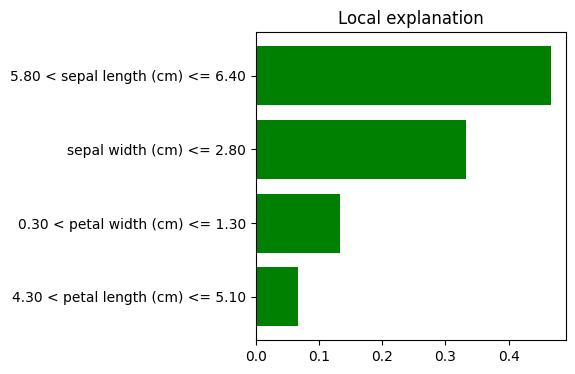

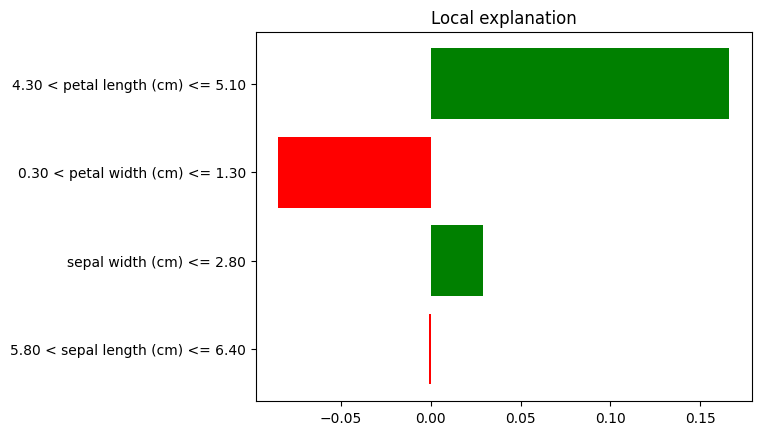

In [4]:
import matplotlib.pyplot as plt

exp.as_pyplot_figure()
plt.show()

exp_ridge.as_pyplot_figure()
plt.show()